In [1]:
%matplotlib inline 

import os
import glob
import numpy as np
import pandas as pd
from skimage import io 
import subprocess as sp
import matplotlib
import matplotlib.pyplot as plt

raster shape (16781, 17568, 2)


/home/meganmason/Documents/projects/thesis/analysis/virtual_envs/data_analysis/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


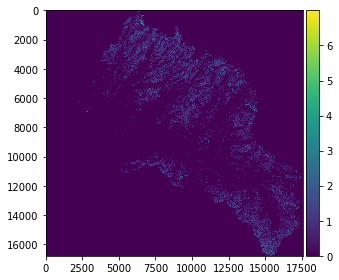

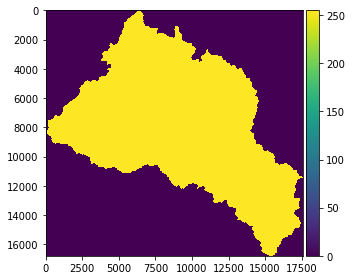

In [2]:
# path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/'
path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/clipped/20150325_clipped.tif'

# for f in sorted(glob.glob(os.path.join(path,'*.tif'))):
raster = io.imread(path)
print("raster shape",raster.shape)
io.imshow(raster[:,:,0]) #snow depth, band1
io.show()

io.imshow(raster[:,:,1]) #alpha mask, band2
io.show()
           

In [3]:
# convert to numpy array
array = np.array(raster[:,:,0]) #RAW array of lidar tif
print("array shape",array.shape)

array shape (16781, 17568)


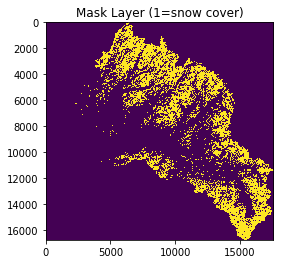

In [12]:
#Ernesto method....
sca_m = array.copy()
# print(sca)

# #mask SCA (boolean)
sca_m[sca_m > 0] = 1 #make SCA mask
plt.imshow(sca_m)
plt.title('Mask Layer (1=snow cover)')

plt.show()

In [22]:
mu_sd = np.mean(sca_m) #mean snow depth, from sca
print("mean snow depth", mu_sd,'meters')
std_sd = np.std(sca_m)
print("std snow depth", std_sd)
a=array.copy()
a[sca_m==1]
# plt.imshow(a[sca_m==1])
# plt.show()

mean snow depth 0.14076577 meters
std snow depth 0.34778953


array([1.1276907 , 1.6151785 , 1.7281545 , ..., 0.4900564 , 0.07709254,
       0.18915309], dtype=float32)